 # Brazilian's National Examination of the Student's Performance (ENADE): an analysis of the state of Bahia

#  0.0. IMPORTS

In [146]:
import warnings

import numpy             as np
import pandas            as pd
import seaborn           as sns
import scipy.stats       as ss
import matplotlib.pyplot as plt


from IPython.display       import Image
from IPython.core.display  import HTML

pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings( 'ignore' )

## 0.1. Helper Functions

In [147]:
def jupyter_settings(): # adjust the notebook window (make it longer)
    %matplotlib inline
    %pylab inline
    
       
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [148]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [149]:
# set some default figure paramenters and style
plt.rcParams[ 'figure.figsize' ] = [25, 12]
plt.rcParams[ 'font.size' ] = 24
sns.set_style( "white" )

## 0.2. Loading Data

In [32]:
# choosig columns to load
cols = ['CO_ORGACAD', 'CO_MODALIDADE', 'CO_UF_CURSO', 'NU_IDADE', 'TP_SEXO','CO_TURNO_GRADUACAO', 
        'TP_PRES', 'TP_PR_GER', 'TP_PR_OB_FG', 'TP_PR_DI_FG', 'TP_PR_OB_CE', 'TP_PR_DI_CE', 
        'NT_GER', 'NT_FG', 'NT_OBJ_FG',
       'QE_I01','QE_I02', 'QE_I04', 'QE_I05', 'QE_I08', 'QE_I10', 'QE_I13','QE_I17','QE_I18', 'QE_I21']

In [126]:
# loading dataset
df_raw = pd.read_csv('data/microdados_enade_2018.txt', sep=';', decimal = ',', usecols = cols)

In [127]:
# selecting only Bahia's data
df = df_raw[df_raw['CO_UF_CURSO'] == 29]

# 1.0. DATA SET ANALYSIS

In [128]:
df1 = df.copy()

## 1.1. Data Dimensions

In [129]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 20910
Number of Cols: 25


## 1.2. Data Types

In [131]:
df1.dtypes

,CO_ORGACAD,CO_MODALIDADE,CO_UF_CURSO,NU_IDADE,TP_SEXO,CO_TURNO_GRADUACAO,TP_PRES,TP_PR_GER,TP_PR_OB_FG,TP_PR_DI_FG,TP_PR_OB_CE,TP_PR_DI_CE,NT_GER,NT_FG,NT_OBJ_FG,QE_I01,QE_I02,QE_I04,QE_I05,QE_I08,QE_I10,QE_I13,QE_I17,QE_I18,QE_I21
218,10022,1,29,36,M,4.000,222,222,222,222,222,222,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,10022,1,29,56,M,1.000,555,555,555,555,555,555,39.200,52.500,87.500,B,D,E,C,D,A,A,E,A,A
220,10022,1,29,55,F,4.000,555,555,555,555,555,555,60.100,43.600,25.000,A,D,D,D,C,D,A,B,B,A
221,10022,1,29,64,F,4.000,555,555,555,555,555,333,24.000,28.700,37.500,B,D,B,E,E,D,A,A,A,A
222,10022,1,29,42,M,4.000,555,555,555,555,555,555,28.400,33.700,37.500,A,A,E,E,D,D,A,B,A,A


## 1.3. Checking for NANs

In [132]:
df1.isna().sum()

CO_ORGACAD               0
CO_MODALIDADE            0
CO_UF_CURSO              0
NU_IDADE                 0
TP_SEXO                  0
CO_TURNO_GRADUACAO       0
TP_PRES                  0
TP_PR_GER                0
TP_PR_OB_FG              0
TP_PR_DI_FG              0
TP_PR_OB_CE              0
TP_PR_DI_CE              0
NT_GER                2939
NT_FG                 2939
NT_OBJ_FG             2939
QE_I01                2063
QE_I02                2063
QE_I04                2063
QE_I05                2063
QE_I08                2063
QE_I10                2063
QE_I13                2063
QE_I17                2063
QE_I18                2063
QE_I21                2063
dtype: int64

In [133]:
df1.dropna(inplace = True)

## 1.4. Descriptive Statistics

In [11]:
#df1.dropna(inplace = True)
numeric_cols = ['NU_IDADE', 'NT_GER', 'NT_FG', 'NT_OBJ_FG','NT_DIS_FG','NT_CE', 'NT_OBJ_CE', 'NT_DIS_CE']
num_attributes = df1[numeric_cols].copy()
num_attributes.dropna(inplace = True)

In [18]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame(num_attributes.quantile(.25)).T
d5 = pd.DataFrame(num_attributes.quantile(.75)).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d7 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d8 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T


# concatenar
m = pd.concat( [d2, d4, ct2, d5,  d3, d6, ct1, d1, d7, d8] ).T.reset_index()
m.columns = ['attributes', 'min', '25%','median','75%', 'max',  'range', 'mean', 'std', 'skew', 'kurtosis']
m

,attributes,min,25%,median,75%,max,range,mean,std,skew,kurtosis
0,NU_IDADE,18.000,24.000,27.000,34.000,78.000,60.000,30.049,8.699,1.491,2.107
1,NT_GER,0.000,30.600,40.100,50.900,90.400,90.400,41.113,14.340,0.248,-0.305
2,NT_FG,0.000,32.700,45.300,58.650,96.200,96.200,45.864,17.807,0.051,-0.495
3,NT_OBJ_FG,0.000,37.500,50.000,62.500,100.000,100.000,50.915,23.702,0.091,-0.647
4,NT_DIS_FG,0.000,27.500,41.000,52.000,92.000,92.000,38.288,19.231,-0.495,-0.319
5,NT_CE,0.000,28.100,38.600,50.200,92.100,92.100,39.513,15.536,0.234,-0.348
6,NT_OBJ_CE,0.000,30.400,41.700,54.200,95.800,95.800,42.060,16.728,0.195,-0.365
7,NT_DIS_CE,0.000,8.300,23.300,38.300,100.000,100.000,25.056,19.653,0.469,-0.476


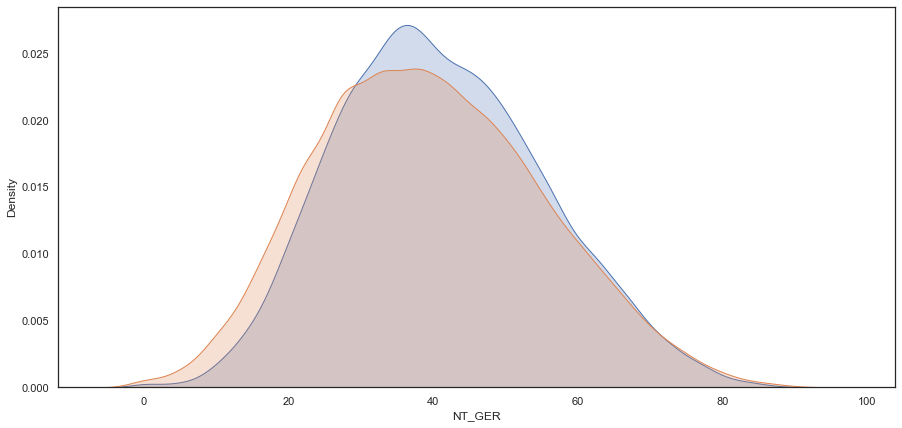

In [19]:
plt.figure(figsize=(15,7))
sns.kdeplot( num_attributes['NT_GER'], label='Privada', shade=True )
sns.kdeplot( num_attributes['NT_CE'], label='Publica', shade=True );

# 2.0. FEATURE ENGINEERING

In [134]:
df2 = df1.copy()

Some categorical columns have numbers or letters representing the classes. The dataset has a dictionary for the variables. Thus, Based on it, the attributes are going to be changed so it can be better visualized in plots. I used some abbreviations:
<br>
* CEFET: Centro Federal de Educação Tecnológica.
* IFECT: Instituo Federal de Educação, Ciência e Tecnologia.
* EJA: Educação de Jovens e Adultos.

In [135]:
df2['CO_ORGACAD'] = df2['CO_ORGACAD'].map({10019:'CEFET', 10020:'Centro Universitário', 
                                           10022:'Faculdade', 10026:'IFECT',
                                          10028:'Universidade'})
df2['CO_MODALIDADE'] = df2['CO_MODALIDADE'].map({1:'Presencial', 2:'À Distância'})
df2['CO_TURNO_GRADUACAO'] = df2['CO_TURNO_GRADUACAO'].map({1:'Matutino', 2:'Vespertino', 3:'Integral',4:'Noturno'})

df2['TP_PRES'] = df2['TP_PRES'].map({222:'Ausente', 334:'Eliminado: participacao indevida', 444:'Ausente: dupla graduação',555:'Presente com resultado válido', 556:'Presente com resultado desconsiderado pela Aplicadora'})
df2['TP_PR_GER'] = df2['TP_PR_GER'].map({222:'Ausente', 333:'Participação com prova em branco', 555:'Participação com respostas na prova',556:'Participação com resultado desconsiderado pela Aplicadora'})
df2['TP_PR_OB_FG'] = df2['TP_PR_OB_FG'].map({222:'Ausente', 333:'Participação com prova em branco', 555:'Participação com respostas na prova',556:'Participação com resultado desconsiderado pela Aplicadora'})
df2['TP_PR_DI_FG'] = df2['TP_PR_DI_FG'].map({222:'Ausente', 333:'Participação com prova em branco', 555:'Participação com respostas na prova',556:'Participação com resultado desconsiderado pela Aplicadora'})
df2['TP_PR_OB_CE'] = df2['TP_PR_OB_CE'].map({222:'Ausente', 333:'Participação com prova em branco', 555:'Participação com respostas na prova',556:'Participação com resultado desconsiderado pela Aplicadora'})
df2['TP_PR_DI_CE'] = df2['TP_PR_DI_CE'].map({222:'Ausente', 333:'Participação com prova em branco', 555:'Participação com respostas na prova',556:'Participação com resultado desconsiderado pela Aplicadora'})

df2['QE_I01'] = df2['QE_I01'].map({'A':'Solteiro (a)', 'B':'Casado (a)', 'C':'Separado (a) / Divorciado (a)', 'D':'Viuvo (a)', 'E': 'Outro'})
df2['QE_I02'] = df2['QE_I02'].map({'A':'Branca', 'B':'Preta', 'C':'Amarela', 'D':'Parda', 'E': 'Indígena', 'F': 'Não quis declarar'})
df2['QE_I04'] = df2['QE_I04'].map({'A':'Nenhuma', 'B':'Fundamental: 1º ao 5º ano', 'C':'Fundamental: 6º ao 9º ano', 'D':'Ensino Médio', 'E': 'Superior (graduação)', 'F': 'Pós-Graduação'})
df2['QE_I05'] = df2['QE_I05'].map({'A':'Nenhuma', 'B':'Fundamental: 1º ao 5º ano', 'C':'Fundamental: 6º ao 9º ano', 'D':'Ensino Médio', 'E': 'Superior (graduação)', 'F': 'Pós-Graduação'})
df2['QE_I08'] = df2['QE_I08'].map({'A':'Até 1,5', 'B':'De 1,5 a 3', 'C':'De 3 a 4,5', 'D':'De 4,5 a 6', 'E': 'de 6 a 10', 'F': 'De 10 a 30', 'G':'Acima de 30'})
df2['QE_I10'] = df2['QE_I10'].map({'A':'Não Trabalha', 'B':'Trabalha Eventualmente', 'C':'Trabalha 20h semanais', 'D':'Trabalha entre 21h e 39h semanais', 'E': 'Trabalha 40h semanais ou mais'})
df2['QE_I13'] = df2['QE_I13'].map({'A':'Nenhum', 'B':'Iniciação Científica', 'C':'Extensão', 'D':'Monitoria/Tutoria', 'E': 'Bolsa PET', 'F': 'Outro Tipo de Bolsa'})
df2['QE_I17'] = df2['QE_I17'].map({'A':'Total em Escola Pública', 'B':'Total em Escola Privada', 'C':'Total no Exteriro', 'D':'Maior Parte em Pública', 'E': 'Marior Parte em Particular', 'F': 'Parte no Brasil e Parte no exterior'})
df2['QE_I18'] = df2['QE_I18'].map({'A':'Ensino Médio Tradicional', 'B':'Profi. Técnico', 'C':'prof. Magistério', 'D':'EJA e/ou Supletivo', 'E': 'Outra'})
df2['QE_I21'] = df2['QE_I21'].map({'A':'Sim', 'B':'Não'})

In [136]:
df2.drop(['CO_UF_CURSO'], inplace =True, axis=1)

# 3.0. EXPLORATORY DATA ANALYSIS

In [138]:
df3 = df2.copy()

## 3.1. Education Institution Analysis

### 3.1.1. Education Institution Category

In [139]:
df3['CO_ORGACAD'].value_counts()

Faculdade               7354
Universidade            6123
Centro Universitário    4349
IFECT                     32
Name: CO_ORGACAD, dtype: int64

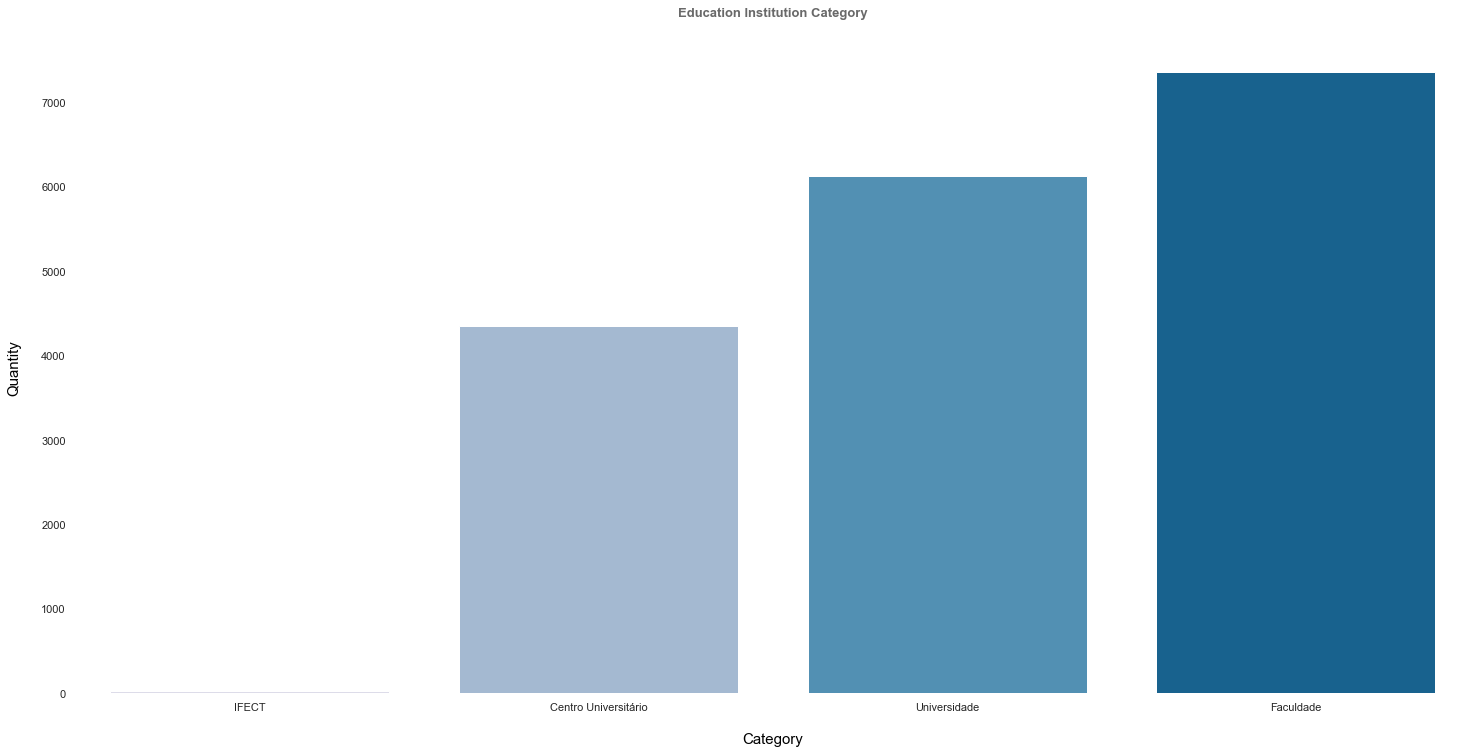

In [151]:
g1 = sns.countplot(x='CO_ORGACAD', data=df3, palette='PuBu',
              order=df3['CO_ORGACAD'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Education Institution Category',
               pad = 25,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Category', color = 'black', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'black', labelpad = 20, fontsize = 15);

### 3.1.2. Modality of Education 

In [141]:
df3['CO_MODALIDADE'].value_counts()

Presencial     16910
À Distância      948
Name: CO_MODALIDADE, dtype: int64

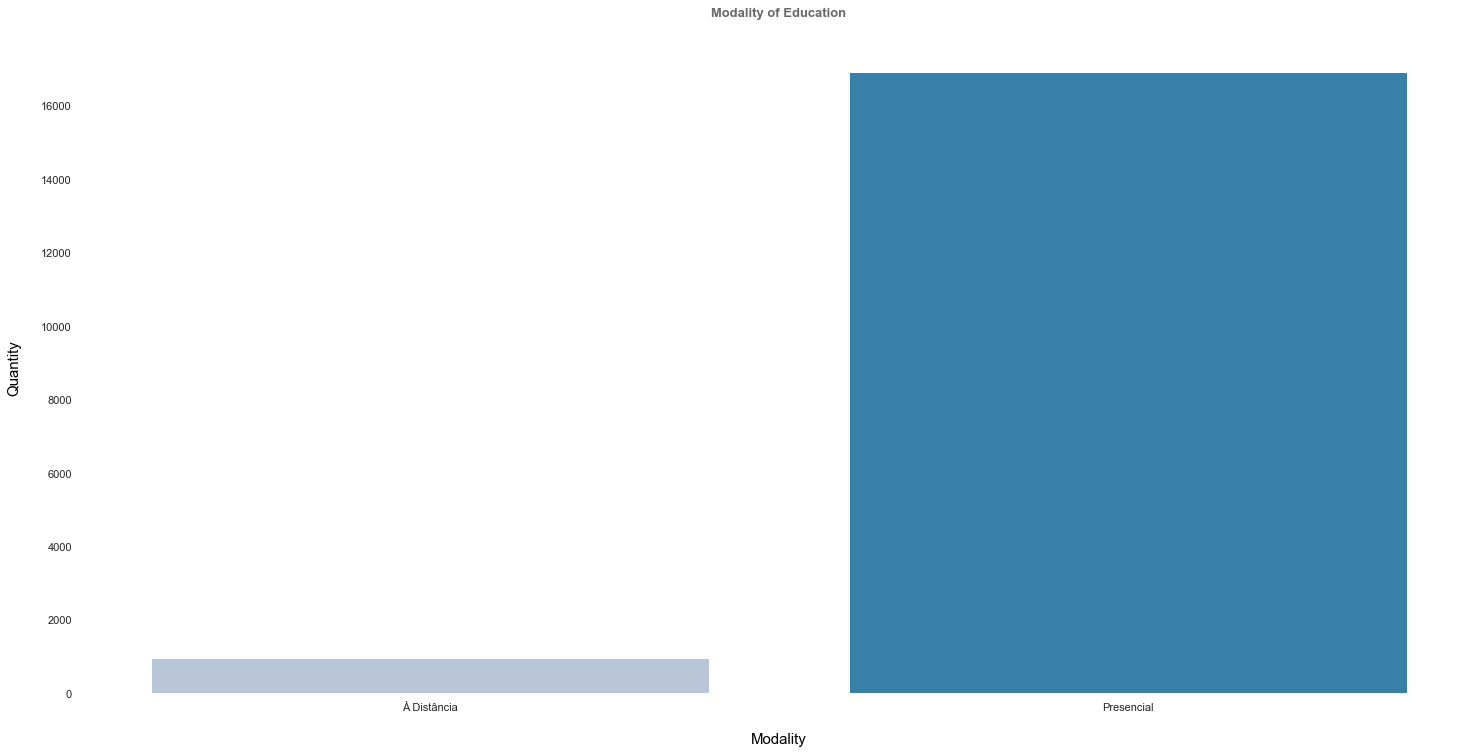

In [150]:
g1 = sns.countplot(x='CO_MODALIDADE', data=df3, palette='PuBu',
              order=df3['CO_MODALIDADE'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Modality of Education',
               pad = 25,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Modality', color = 'black', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'black', labelpad = 20, fontsize = 15);

## 3.2. Student Analysis

### 3.2.1. Age, Gender, Race and Marital Status

Conclusions:
* There are more women than men in the exam;
* Both women and men's ages are more concentrated between 20 and 30 years old;
* There are more mulattos students, followed by black and then white.
* There are more single students. Their age is more concentrated between 20 a and 28 years old. Marriage students's age is more concentrated in a greater range: 20 and 45 years old. We can't say anything so clearly about divorced and windower's age distribution, there's no evidence of concentration

**Age**

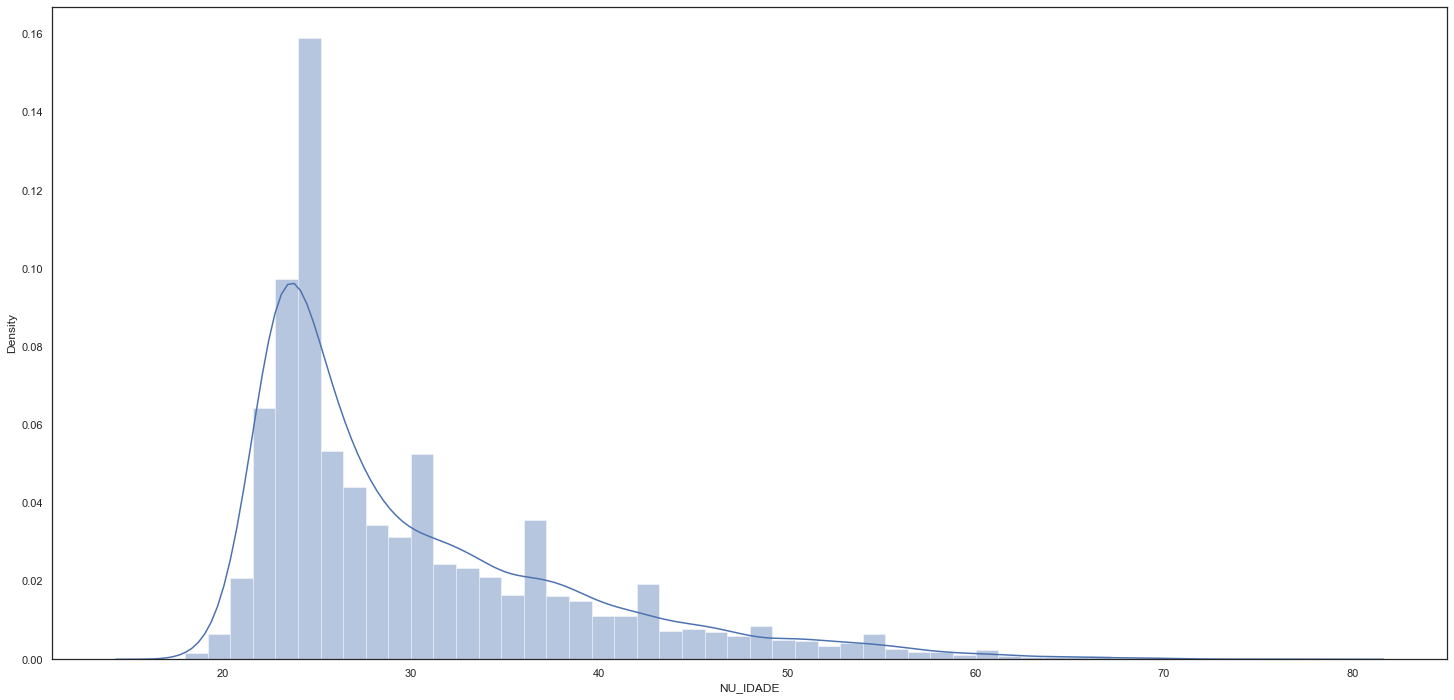

In [81]:
sns.distplot(df3['NU_IDADE']);

The age is right skewd (skewness = 2.1). So, the mean is greater than the median, indicating that (and we can see in the plot) there are more young students than old ones.

**Gender and Age**

In [78]:
df3['TP_SEXO'].value_counts()

F    11249
M     6609
Name: TP_SEXO, dtype: int64

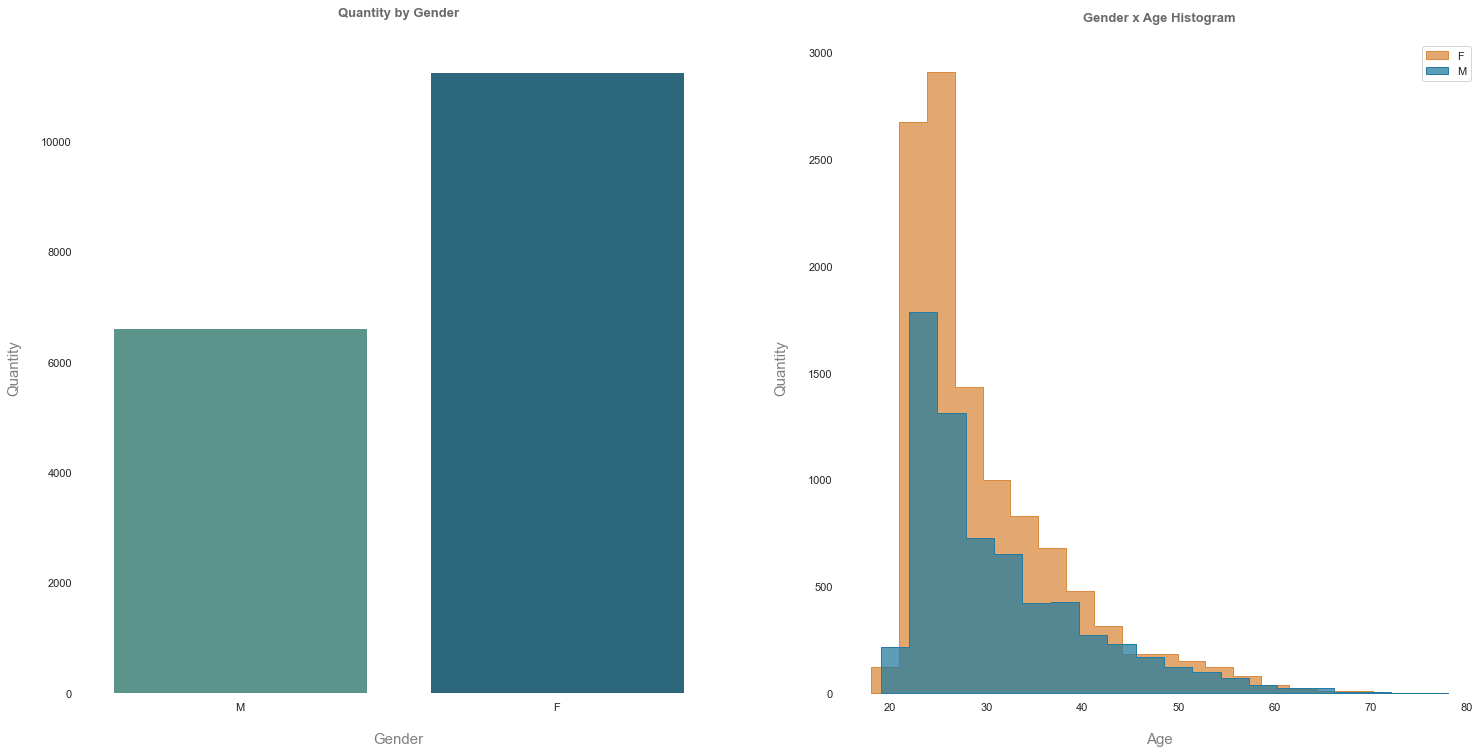

In [96]:
g1 = plt.subplot(1, 2, 1)
g1 = sns.countplot(x='TP_SEXO', data=df3, palette='crest',
              order=df3['TP_SEXO'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Quantity by Gender',
               pad = 25,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Gender', color = 'grey', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)

################################################
g2 = plt.subplot(1, 2, 2)
sns.histplot(df3[df3['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(df3[df3['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')

g2 = plt.title('Gender x Age Histogram',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Age', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.legend();

**Race by gender**

In [85]:
df3['QE_I02'].value_counts()

Parda                8266
Preta                4875
Branca               3770
Não quis declarar     450
Amarela               424
Indígena               73
Name: QE_I02, dtype: int64

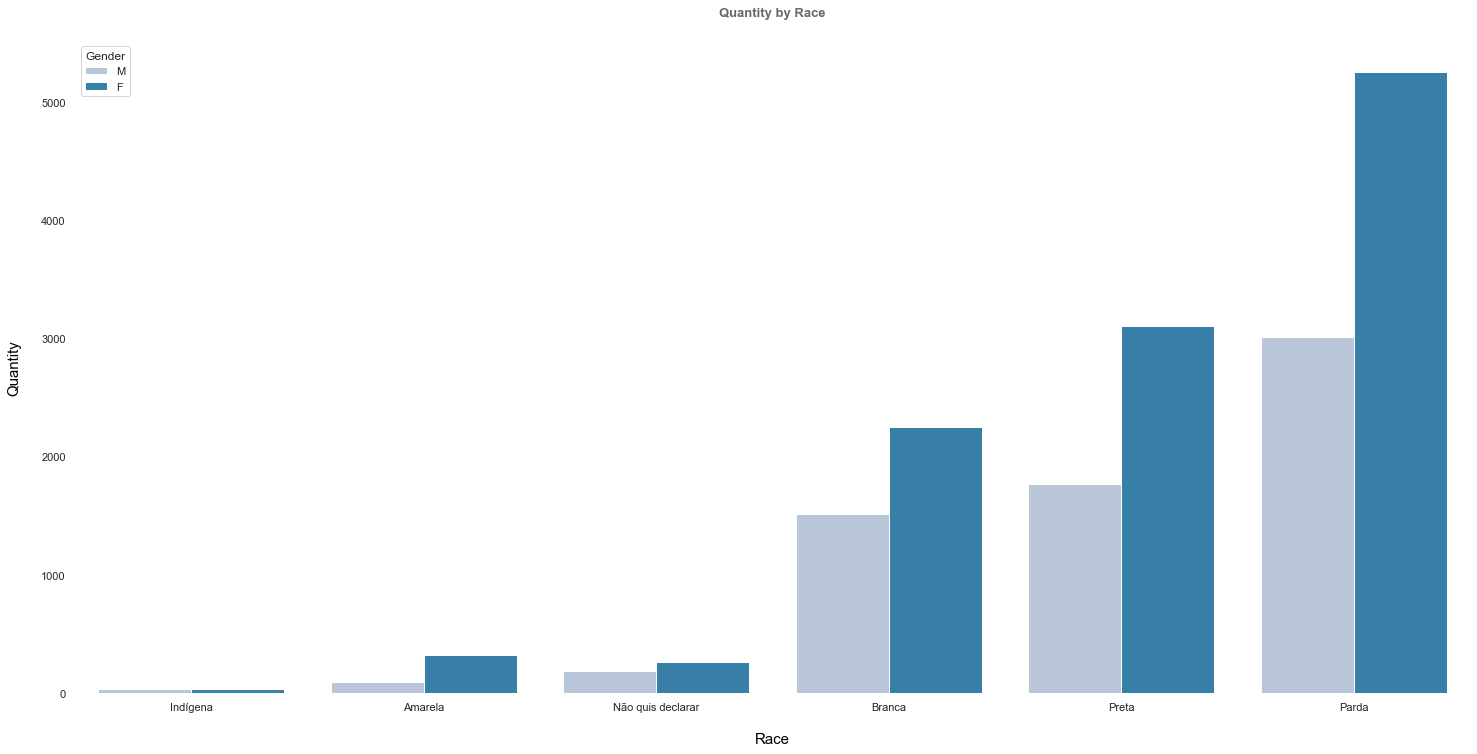

In [101]:
g1 = sns.countplot(x='QE_I02', hue = 'TP_SEXO', data=df3, palette='PuBu',
              order=df3['QE_I02'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Quantity by Race',
               pad = 25,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Race', color = 'black', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'black', labelpad = 20, fontsize = 15)
g1 = plt.legend(title='Gender');

**Marital Status**

In [102]:
df3['QE_I01'].value_counts()

Solteiro (a)                     13185
Casado (a)                        3439
Outro                              643
Separado (a) / Divorciado (a)      530
Viuvo (a)                           61
Name: QE_I01, dtype: int64

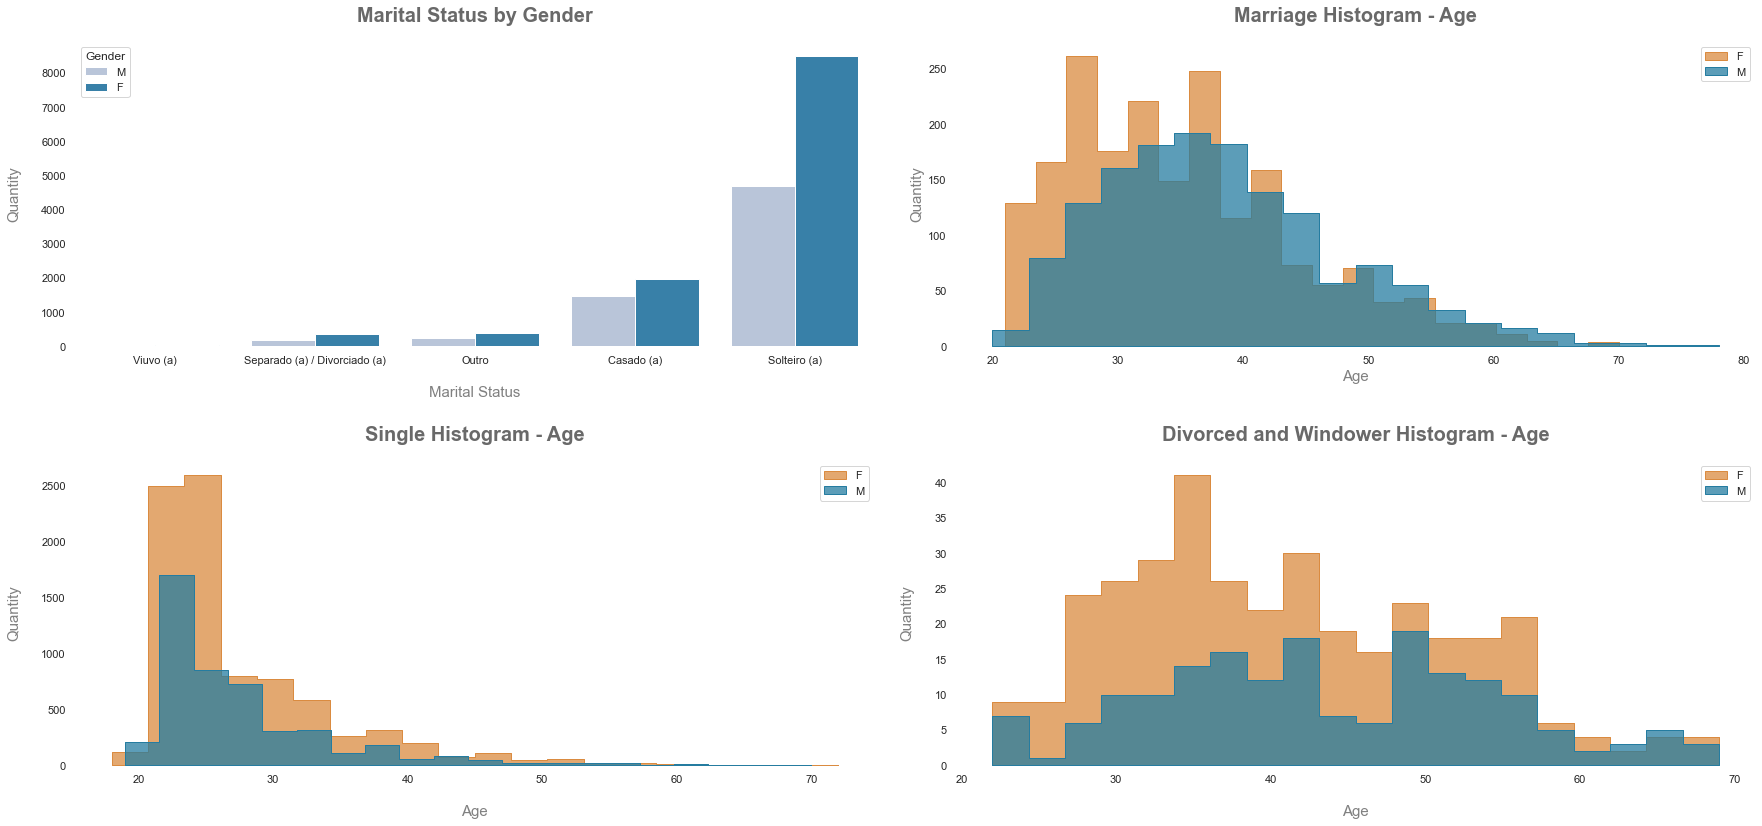

In [121]:
g1 = plt.subplot(2, 2, 1)
g1 = sns.countplot(x='QE_I01', hue = 'TP_SEXO', data=df3, palette='PuBu',
              order=df3['QE_I01'].value_counts()[:]\
             .sort_values().index)
g1 = plt.title('Marital Status by Gender',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g1 = sns.despine(bottom = True, left=True)
g1 = plt.xlabel('Marital Status', color = 'grey', labelpad = 20, fontsize = 15)
g1 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
g1 = plt.legend(title='Gender')

################################################
g2 = plt.subplot(2, 2, 2)
married = df3[df3['QE_I01'] == 'Casado (a)']
sns.histplot(married[married['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(married[married['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')

g2 = plt.title('Marriage Histogram - Age',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Age', color = 'grey',  fontsize = 15)
g2 = plt.ylabel('Quantity', color = 'grey', fontsize = 15)
g2 = plt.legend()

################################################
g3 = plt.subplot(2, 2, 3)
single = df3[df3['QE_I01'] == 'Solteiro (a)']
sns.histplot(single[single['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(single[single['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')

g2 = plt.title('Single Histogram - Age',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g2 = sns.despine(bottom = True, left=True)
g2 = plt.xlabel('Age', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
g2 = plt.legend()

################################################
g4 = plt.subplot(2, 2, 4)
divorced = df3[(df3['QE_I01'] == 'Separado (a) / Divorciado (a)') | (df['QE_I01'] == 'Viuvo (a)')]
sns.histplot(divorced[divorced['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(divorced[divorced['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')

g4 = plt.title('Divorced and Windower Histogram - Age',
               pad = 20,
         fontsize = 20, color ='dimgrey', fontweight = 'bold')
g4 = sns.despine(bottom = True, left=True)
g4 = plt.xlabel('Age', color = 'grey', labelpad = 20, fontsize = 15)
g4 = plt.ylabel('Quantity', color = 'grey', labelpad = 20, fontsize = 15)
g4 = plt.legend()
plt.tight_layout();

### 3.2.2. Day shift, High School Education and School Type

to do..